In [1]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import scipy.stats as stats
import datetime as dt

In [2]:
import pandas_datareader.data as web
start = dt.datetime(2011, 1, 1)
end = dt.datetime(2021, 1, 8)
JPX = web.DataReader("JPY=X", 'yahoo', start=start, end=end)

<AxesSubplot:xlabel='Date'>

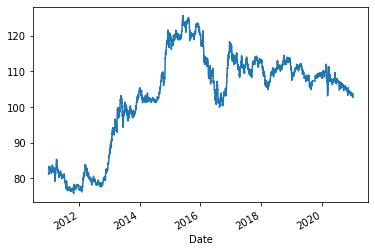

In [3]:
JPX['Close'].plot()

In [4]:
cny=web.DataReader("CNY=X", 'yahoo', start=start, end=end)

<AxesSubplot:xlabel='Date'>

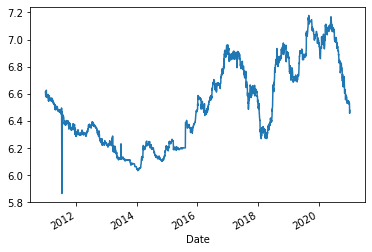

In [5]:
cny['Close'].plot()

In [6]:
cny.iloc[-1,:]

High         6.4774
Low          6.4538
Open         6.4772
Close        6.4772
Volume       0.0000
Adj Close    6.4772
Name: 2021-01-08 00:00:00, dtype: float64

In [7]:
# get rid of the outlier
cny.iloc[cny['Close'].argmin(),3]=cny.iloc[cny['Close'].argmin()-1,3]

<AxesSubplot:xlabel='Date'>

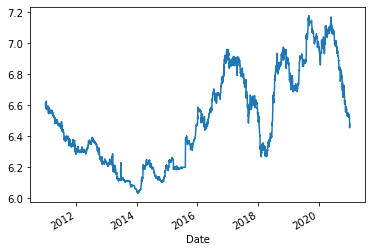

In [8]:
cny['Close'].plot()

In [9]:
logr=cny['Close'].apply(np.log).diff().dropna()
# logr=cny['Close'].diff().dropna()

<AxesSubplot:xlabel='Date'>

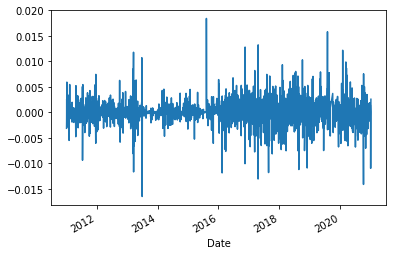

In [10]:
logr.plot()

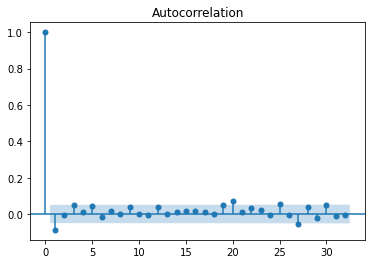

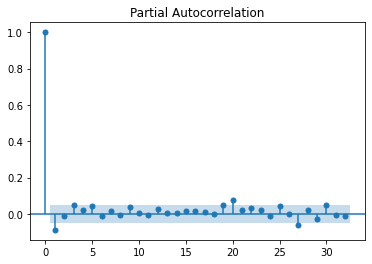

In [11]:
## check for serial correlation
yearsince=2015
acf=plot_acf(logr[logr.index.year>=yearsince])
pacf=plot_pacf(logr[logr.index.year>=yearsince])

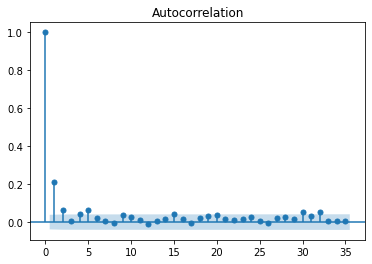

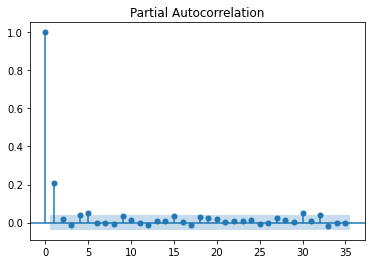

In [12]:
## check for volatility clustering
yearsince=2010
acf=plot_acf(logr[logr.index.year>=yearsince]**2)
pacf=plot_pacf(logr[logr.index.year>=yearsince]**2)

In [13]:
# Use GARCH model: p=1,o=1,q=1

In [14]:
model=arch_model(logr[:-1],p=1,o=1,q=1,dist='normal')
model_fit=model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5473778156823871.0
Iteration:      2,   Func. Count:     22,   Neg. LLF: 296453.446252422
Optimization terminated successfully    (Exit mode 0)
            Current function value: -12228.317657785505
            Iterations: 3
            Function evaluations: 30
            Gradient evaluations: 2


In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                12228.3
Distribution:                  Normal   AIC:                          -24446.6
Method:            Maximum Likelihood   BIC:                          -24417.3
                                        No. Observations:                 2588
Date:                Mon, Jan 25 2021   Df Residuals:                     2583
Time:                        22:07:11   Df Model:                            5
                                   Mean Model                                  
===============================================================================
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu         -3.1567e-05  1.610e-08  -1960.862      0.000 [-3.160e-05,-3.153e-05]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      5.2428e-07  2.010e-12  2.608e+05      0.000  [5.243e-07,5.243e-07]
alpha[1]       0.1000  3.158e-02      3.166  1.544e-03    [3.810e-02,  0.162]
gamma[1]       0.0100  3.314e-02      0.302      0.763 [-5.495e-02,7.495e-02]
beta[1]        0.7950  3.373e-02     23.566 8.526e-123      [  0.729,  0.861]
=============================================================================

Covariance estimator: robust
"""

## since gamma has a high p value, discard it


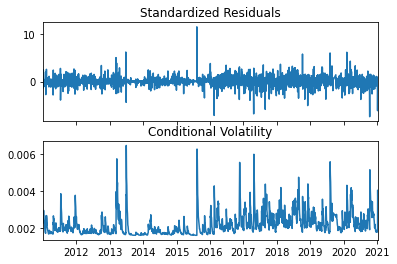

In [17]:
fig=model_fit.plot()


In [18]:
model=arch_model(logr[500:],p=1,o=0,q=1,dist='normal')
model_fit=model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 42072702438982.945
Iteration:      2,   Func. Count:     20,   Neg. LLF: 92079466372574.73
Iteration:      3,   Func. Count:     35,   Neg. LLF: 23585176562.837345
Iteration:      4,   Func. Count:     48,   Neg. LLF: -9745.340177081687
Optimization terminated successfully    (Exit mode 0)
            Current function value: -9745.340175603407
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                9745.34
Distribution:                  Normal   AIC:                          -19482.7
Method:            Maximum Likelihood   BIC:                          -19460.1
                                        No. Observations:                 2089
Date:                Mon, Jan 25 2021   Df Residuals:                     2085
Time:                        22:08:30   Df Model:                            4
                                   Mean Model                                  
===============================================================================
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu         -6.5432e-06  1.734e-08   -377.343      0.000 [-6.577e-06,-6.509e-06]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      5.8190e-07  1.771e-12  3.285e+05      0.000 [5.819e-07,5.819e-07]
alpha[1]       0.1000  3.447e-02      2.901  3.718e-03   [3.244e-02,  0.168]
beta[1]        0.8000  3.631e-02     22.034 1.345e-107     [  0.729,  0.871]
============================================================================

Covariance estimator: robust
"""

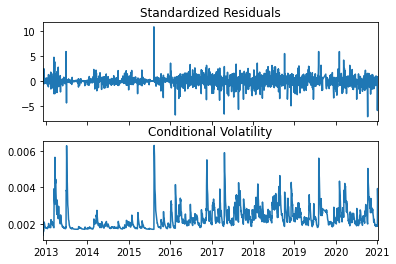

In [19]:
fig=model_fit.plot()

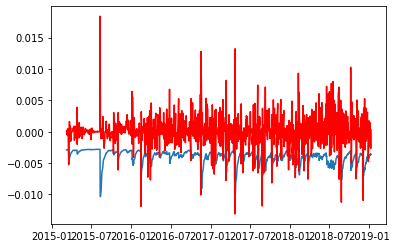

In [24]:
# check the implied vars
plt.plot(model.distribution.ppf(0.05)*model_fit.conditional_volatility[-1500:-500])
plt.plot(logr[-1500:-500],'r')

<AxesSubplot:xlabel='Date'>

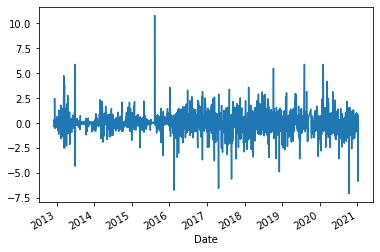

In [25]:
model_fit.std_resid.plot()

In [26]:
model_fit.std_resid

Date
2012-12-04    0.237977
2012-12-05   -0.338260
2012-12-06    0.014891
2012-12-07    0.293500
2012-12-10   -0.399312
                ...   
2021-01-04    0.027311
2021-01-05   -5.851336
2021-01-06   -0.206720
2021-01-07    0.237511
2021-01-08    0.767544
Name: std_resid, Length: 2089, dtype: float64

In [27]:
# check how much skewness and kurtosis is explained
stats.stats.describe(model_fit.std_resid.dropna())

DescribeResult(nobs=2089, minmax=(-7.089792712571525, 10.795628922155029), mean=0.00599022476224096, variance=1.019414173691169, skewness=0.26233053571539366, kurtosis=13.472709123103293)

In [29]:
stats.stats.describe(logr)

DescribeResult(nobs=2589, minmax=(-0.01653702120485656, 0.018411023703377438), mean=-7.979281366389507e-06, variance=5.245369917514608e-06, skewness=0.13549289783523058, kurtosis=8.70269536713011)

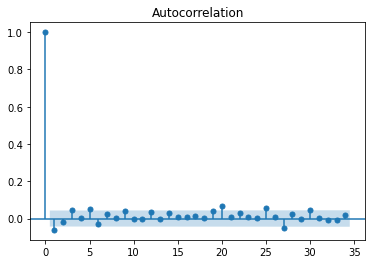

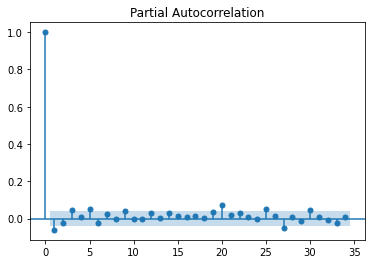

In [31]:
# check if the serial correlation is gone
acf=plot_acf(model_fit.std_resid.dropna())
pacf=plot_pacf(model_fit.std_resid.dropna())

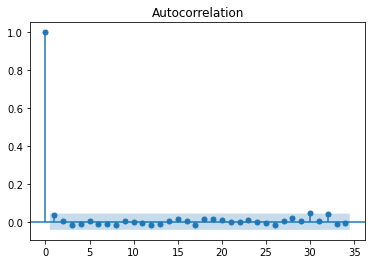

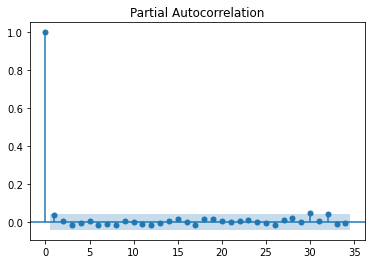

In [30]:
# check if the volatility clustering is gone
acf=plot_acf(model_fit.std_resid.dropna()**2)
pacf=plot_pacf(model_fit.std_resid.dropna()**2)

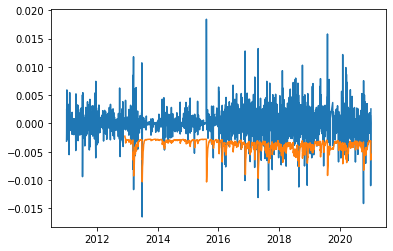

In [32]:
zz=model.distribution.ppf(0.05)
plt.plot(logr)
plt.plot(zz*model_fit.conditional_volatility)


## forcast

In [33]:
test_size=1000
vars={}
mus={}
vols={}
fixed_window_size=500

for i in range(test_size):
    # print(i)
    train,test=logr[-(test_size-i)-fixed_window_size:-(test_size-i)],logr[-(test_size-i):]
    model=arch_model(train,mean="ARX",lags=0,p=1,q=1,dist='normal')
    model_fit=model.fit(disp='off')
    pred=model_fit.forecast(horizon=5)
    
    zz=model.distribution.ppf(0.05)

    
   

    temp_vol=pred.residual_variance.iloc[-1,:].apply(np.sqrt)
    vols[temp_vol.name]=temp_vol
    # print("temp vol name={},vosl=\n {}".format(temp_vol.name,temp_vol))

    temp_mu=pred.mean.iloc[-1,:]
    mus[temp_mu.name]=temp_mu
    # print("temp mu={}".format(temp_mu))

    vars[temp_mu.name]=temp_mu+zz*temp_vol

    

/Users/Ben/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


In [34]:
vars=pd.DataFrame(vars).T
mus=pd.DataFrame(mus).T
vols=pd.DataFrame(vols).T

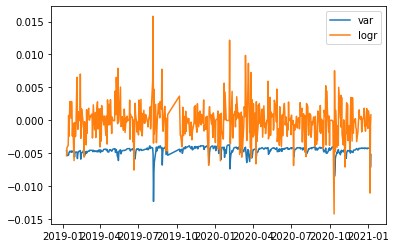

In [35]:
pred_vars=vars.iloc[-500:,0].shift(1).dropna()
plt.plot(pred_vars)
plt.plot(logr.loc[pred_vars.index])
plt.legend(['var','logr'])

In [387]:
help(model.fit)

Help on method fit in module arch.univariate.base:

fit(update_freq: int = 1, disp: str = 'final', starting_values: Union[numpy.ndarray, pandas.core.series.Series] = None, cov_type: str = 'robust', show_warning: bool = True, first_obs: Union[int, str, datetime.datetime, numpy.datetime64, pandas._libs.tslibs.timestamps.Timestamp] = None, last_obs: Union[int, str, datetime.datetime, numpy.datetime64, pandas._libs.tslibs.timestamps.Timestamp] = None, tol: Union[float, NoneType] = None, options: Union[Dict[str, Any], NoneType] = None, backcast: Union[float, numpy.ndarray, NoneType] = None) -> 'ARCHModelResult' method of arch.univariate.mean.ARX instance
    Fits the model given a nobs by 1 vector of sigma2 values
    
    Parameters
    ----------
    update_freq : int, optional
        Frequency of iteration updates.  Output is generated every
        `update_freq` iterations. Set to 0 to disable iterative output.
    disp : str
        Either 'final' to print optimization result or 'off'

In [388]:
help(model_fit.forecast)

Help on method forecast in module arch.univariate.base:

forecast(params: Union[numpy.ndarray, pandas.core.series.Series, NoneType] = None, horizon: int = 1, start: Union[int, str, datetime.datetime, numpy.datetime64, pandas._libs.tslibs.timestamps.Timestamp] = None, align: str = 'origin', method: str = 'analytic', simulations: int = 1000, rng: Union[Callable[[Union[int, Tuple[int, ...]]], numpy.ndarray], NoneType] = None, random_state: numpy.random.mtrand.RandomState = None) -> 'ARCHModelForecast' method of arch.univariate.base.ARCHModelResult instance
    Construct forecasts from estimated model
    
    Parameters
    ----------
    params : ndarray, optional
        Alternative parameters to use.  If not provided, the parameters
        estimated when fitting the model are used.  Must be identical in
        shape to the parameters computed by fitting the model.
    horizon : int, optional
       Number of steps to forecast
    start : {int, datetime, Timestamp, str}, optional
    

In [36]:
model=arch_model(logr.iloc[-1000:],p=1,o=0,q=1,dist='normal')
model_fit=model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.1698659759264068e+16
Iteration:      2,   Func. Count:     19,   Neg. LLF: 7278047756832.567
Iteration:      3,   Func. Count:     32,   Neg. LLF: 98029620.71898855
Iteration:      4,   Func. Count:     43,   Neg. LLF: 106307.51472657622
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4459.949517585226
            Iterations: 5
            Function evaluations: 50
            Gradient evaluations: 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                4459.95
Distribution:                  Normal   AIC:                          -8911.90
Method:            Maximum Likelihood   BIC:                          -8892.27
                                        No. Observations:                 1000
Date:                Mon, Jan 25 2021   Df Residuals:                      996
Time:                        22:16:51   Df Model:                            4
                                   Mean Model                                  
===============================================================================
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu         -8.4104e-05  1.279e-07   -657.413      0.000 [-8.435e-05,-8.385e-05]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.0137e-06  3.737e-11  1.074e+05      0.000 [4.014e-06,4.014e-06]
alpha[1]       0.1000  5.087e-02      1.966  4.934e-02   [2.867e-04,  0.200]
beta[1]        0.4000  6.487e-02      6.166  6.991e-10     [  0.273,  0.527]
============================================================================

Covariance estimator: robust
"""

In [37]:
xxx=model_fit.forecast(start=500,horizon=1)

In [45]:
xxx.variance.iloc[495:505,:]

,h.1
Date,
2019-01-03,NaN
2019-01-04,NaN
2019-01-07,NaN
2019-01-08,NaN
2019-01-09,NaN
2019-01-10,0.000010
2019-01-11,0.000009
2019-01-14,0.000009
2019-01-15,0.000008


<AxesSubplot:xlabel='Date'>

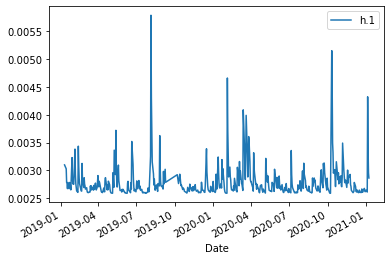

In [46]:
xxx.variance.iloc[500:,:].apply(np.sqrt).plot()

<AxesSubplot:xlabel='Date'>

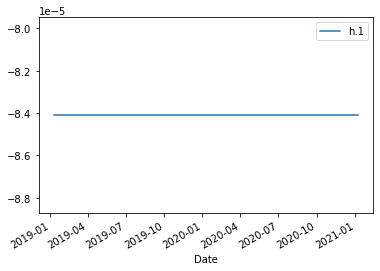

In [47]:
xxx.mean.iloc[500:,:].plot()

<AxesSubplot:xlabel='Date'>

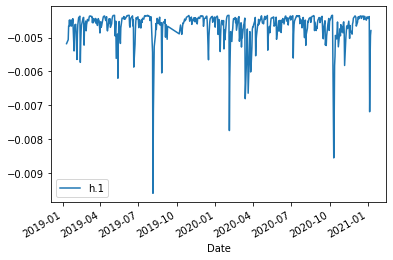

In [48]:
zz=model.distribution.ppf(0.05)
vvvar=xxx.mean.iloc[500:,:]+zz*xxx.variance.iloc[500:,:].apply(np.sqrt)
vvvar.plot()

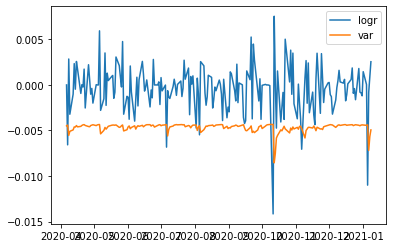

In [51]:
plt.plot(logr.loc[vvvar.iloc[-200:].shift(1).dropna().index])
plt.plot(vvvar.iloc[-200:].shift(1).dropna())

plt.legend(['logr','var'])

In [52]:
suc=logr.loc[vvvar.iloc[-500:].shift(1).dropna().index]<vvvar.iloc[-500:,0].shift(1).dropna()

In [53]:
suc.mean()

0.03206412825651302

In [93]:
help(logr.rolling)

Help on method rolling in module pandas.core.generic:

rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None) method of pandas.core.series.Series instance
    Provide rolling window calculations.
    
    Parameters
    ----------
    window : int, offset, or BaseIndexer subclass
        Size of the moving window. This is the number of observations used for
        calculating the statistic. Each window will be a fixed size.
    
        If its an offset then this will be the time period of each window. Each
        window will be a variable sized based on the observations included in
        the time-period. This is only valid for datetimelike indexes.
    
        If a BaseIndexer subclass is passed, calculates the window boundaries
        based on the defined ``get_window_bounds`` method. Additional rolling
        keyword arguments, namely `min_periods`, `center`, and
        `closed` will be passed to `get_window_bounds`.
    min_periods : in

<AxesSubplot:xlabel='Date'>

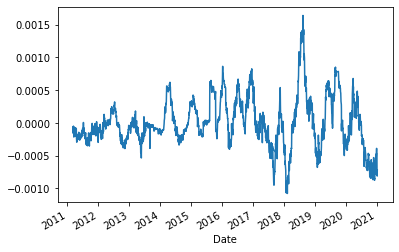

In [54]:
rolling_window=50
mus=logr.rolling(window=50,min_periods=50).mean()
mus.plot()

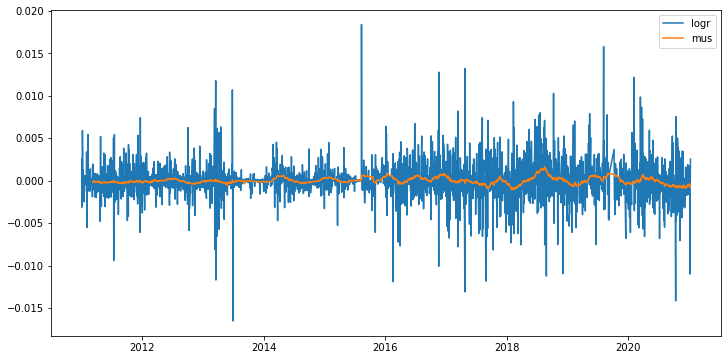

In [55]:
plt.figure(figsize=(12,6))
plt.plot(logr)
plt.plot(mus)

plt.legend(['logr','mus'])

In [56]:
new_logr=(logr.loc[mus.index]-mus).dropna()

<AxesSubplot:xlabel='Date'>

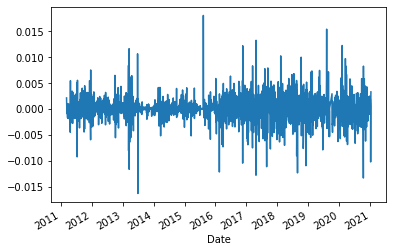

In [57]:
new_logr.plot()

In [58]:
test_size=300
vars={}
mus={}
vols={}
fixed_window_size=500

for i in range(test_size):
    # print(i)
    train,test=new_logr[-(test_size-i)-fixed_window_size:-(test_size-i)],logr[-(test_size-i):]
    model=arch_model(train,mean="ARX",lags=0,p=1,q=1,dist='normal')
    model_fit=model.fit(disp='off')
    pred=model_fit.forecast(horizon=5)
    
    zz=model.distribution.ppf(0.05)

    
   

    temp_vol=pred.residual_variance.iloc[-1,:].apply(np.sqrt)
    vols[temp_vol.name]=temp_vol
    # print("temp vol name={},vosl=\n {}".format(temp_vol.name,temp_vol))

    temp_mu=pred.mean.iloc[-1,:]
    mus[temp_mu.name]=temp_mu
    # print("temp mu={}".format(temp_mu))

    vars[temp_mu.name]=temp_mu+zz*temp_vol

    

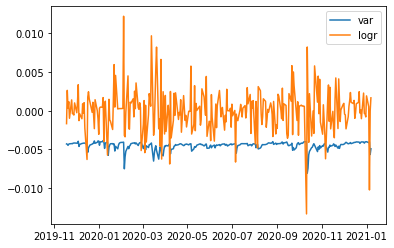

In [59]:
vars=pd.DataFrame(vars).T
mus=pd.DataFrame(mus).T
vols=pd.DataFrame(vols).T

pred_vars=vars.iloc[-500:,0].shift(1).dropna()
plt.plot(pred_vars)
plt.plot(new_logr.loc[pred_vars.index])
plt.legend(['var','logr'])

In [68]:
import sys
try:
    sys.path.append(r"/Users/Ben/Documents/JupyterNotes Library/MyCodeLibrary/Value at Risk")
    from var_ntime import *
except:
    print("wrong path")

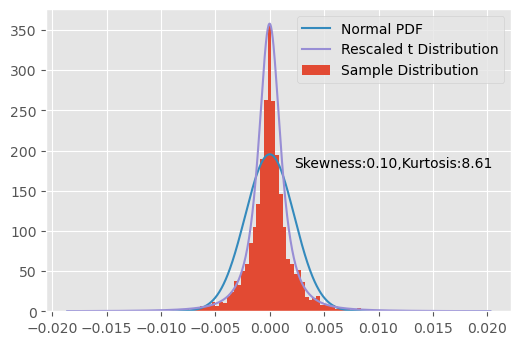

In [70]:
myhist(new_logr,bins=100)

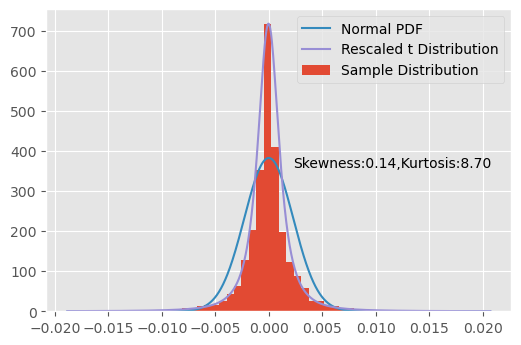

In [80]:
myhist(logr,bins=50)

In [71]:
myvaars=logr.rolling(window=50,min_periods=50).apply(lambda t: myvar(t,alphas=0.05, method="t", tell=False))
myvaars.dropna(inplace=True)

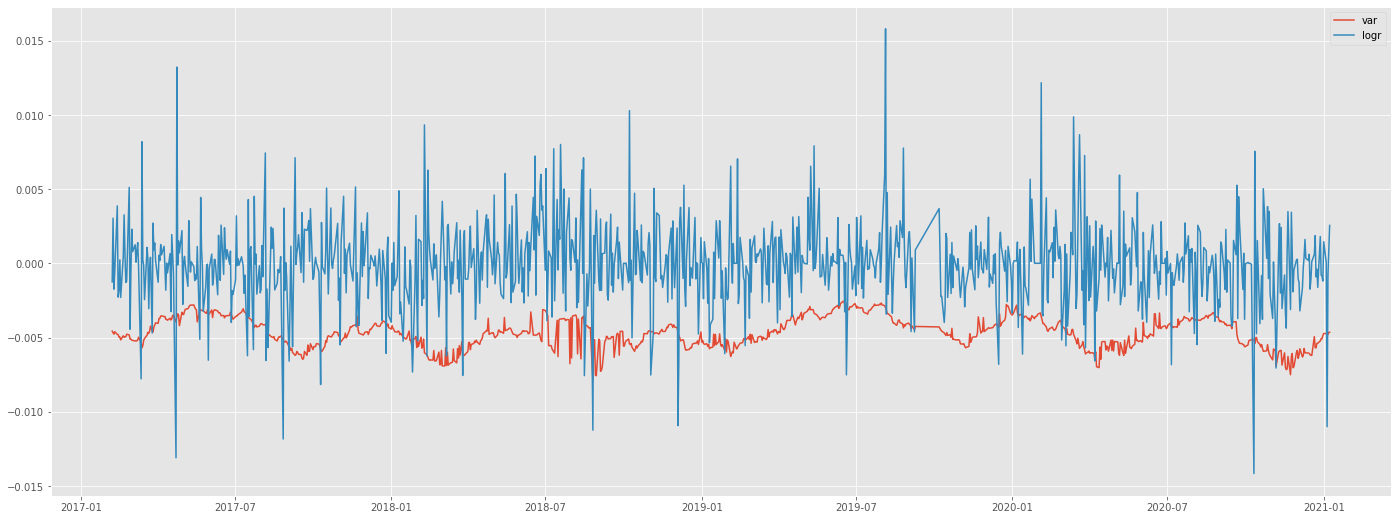

In [72]:
plt.figure(figsize=(24,9))
plt.plot(myvaars[-1000:])
plt.plot(logr.loc[myvaars.index][-1000:])
plt.legend(['var','logr'])

In [73]:
suc_t=logr.loc[myvaars.index]<myvaars
suc_t.mean()

0.05236220472440945